# 3.0 Notebook 3: Exploratory Data Analysis

As we have now cleaned and feature engineered our data and have a good intuition. We take a closer look how the data looks now visually.

## 3.1 Objective

Exploratory data analysis (EDA) is a important step which involes after feature engineering. It is necessary to understand the data in both descriptively and visually to get a full grasp on our data with out making any unnecessary presumption. Before begin with model building it is necessary to understand the data in-depth to avoid any future errors.

Main motive of EDA is to:

> understand data using summary statistics and visualizations, find out insights about data, quality of data
  Before moving forward to data preprocessing we need to have overall picture of our data

Descriptive statistics is the method of drawing brief discription of data using simple numerics. Few common metrics used are mean, standard deviation, and correlation.

Visualization is the process of representing the data into simple plots and charts like bar plot , histogram, etc. 

## 3.2 Descriptive statistics

Summary statistics is the process to describe the data.

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings

#seaborn tweaks
sns.set_style('darkgrid')

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# display all columns
pd.set_option('display.max_columns', None)

# tweaks for matplotlib
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [2]:
# load dataset
df = pd.read_csv('data/data_v2.csv',index_col=False)

In [ ]:
#check dataset
df.head()

In [ ]:
# describe data
df.describe()

In [ ]:
# check skewness
df.skew()

> The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the above table, we can visualise that __rooms, distance, distance, bathroom, house age__ plays importance in predicting the price of property. There are columns which have high skewness like Landsize and BuildingArea which is totally justified.

## 3.3 Visualizations

Lets analyse our data using charts and plots. One of our goals for visualizing the data here is to observe which features are most helpful in predicting price.

We use different types of visualizations like:

1. Box Plots.
2. Histograms.
3. Violin Plots.
4. Correlation Matrix.
5. Scatter Plots.

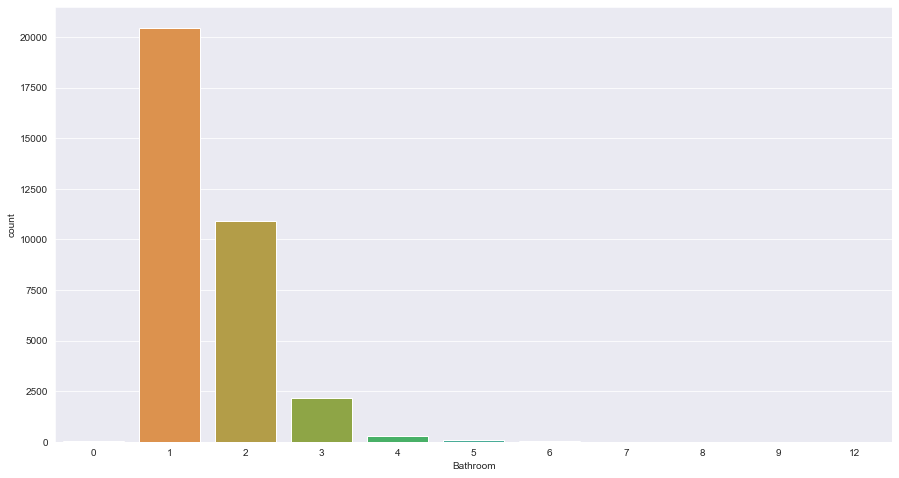

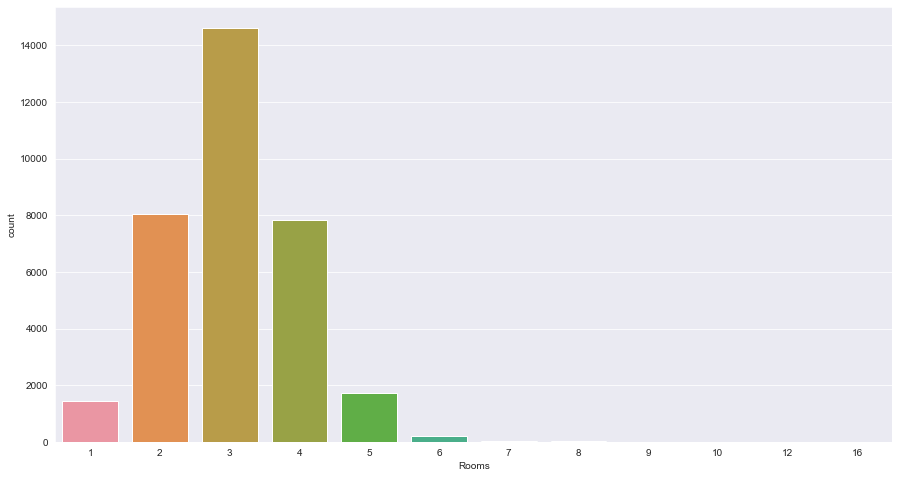

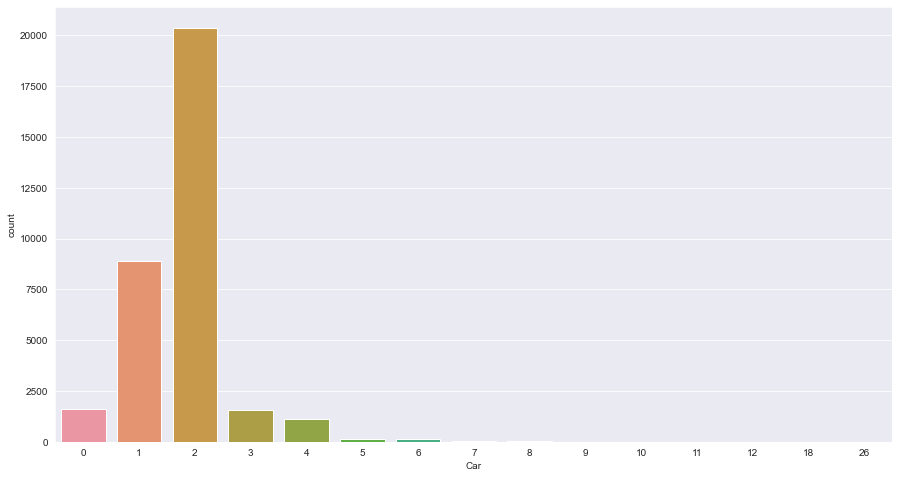

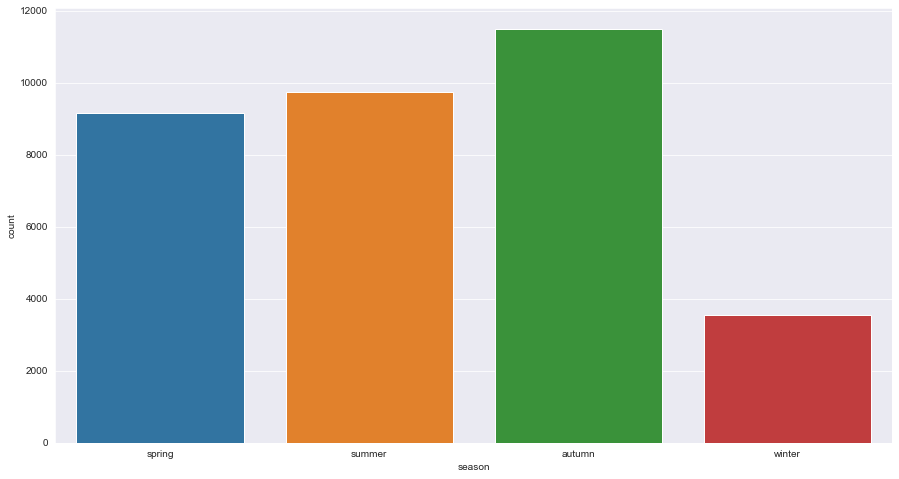

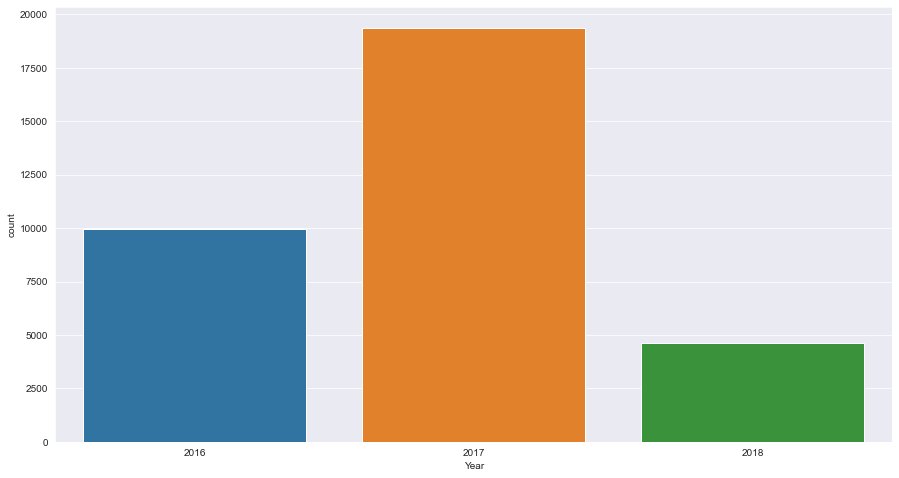

In [6]:
listed = ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in listed:
    plt.figure()
    sns.countplot(x=i, data=df)

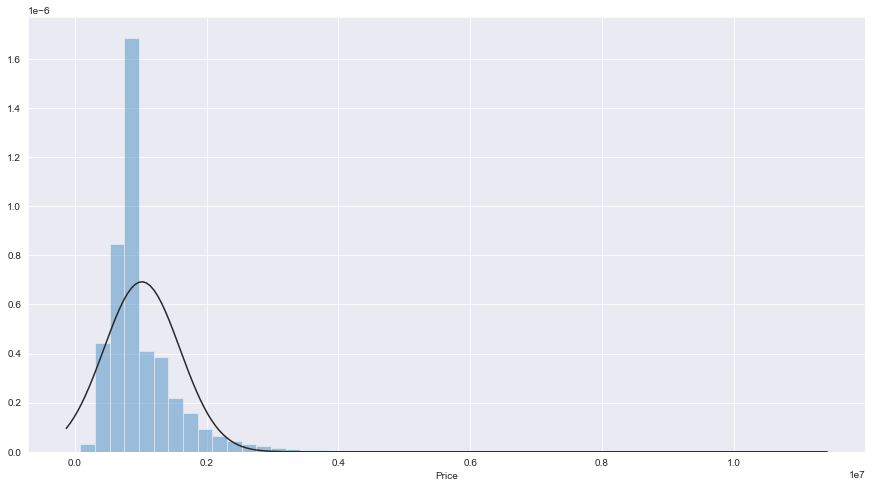

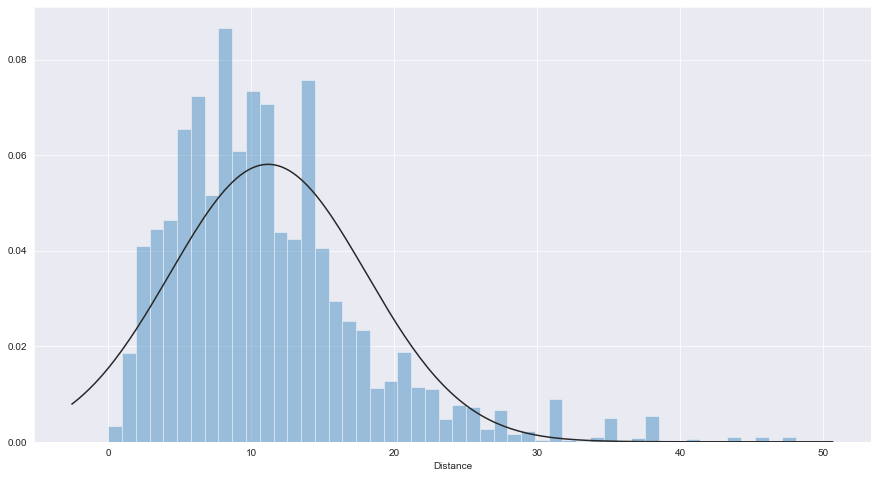

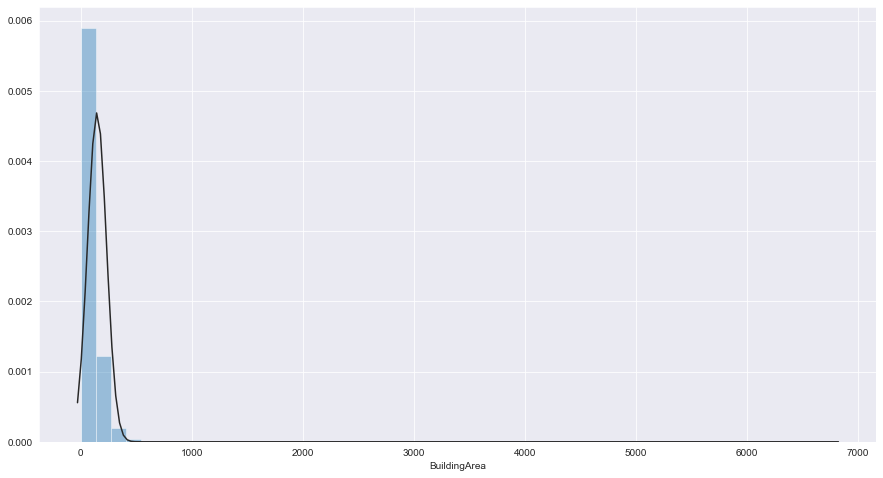

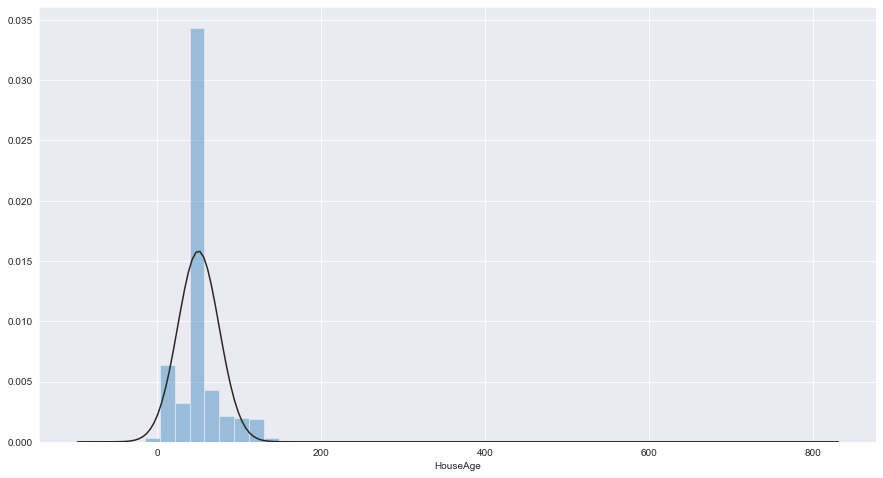

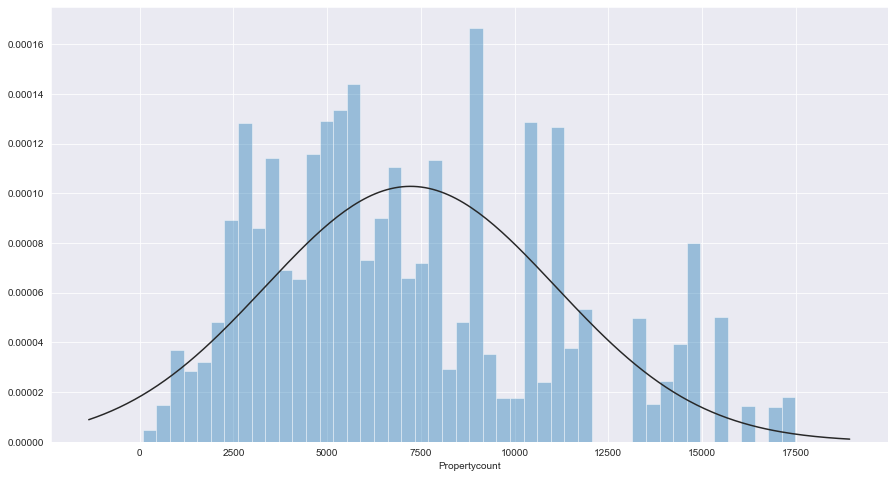

In [7]:
listed_df = [df['Price'], df['Distance'], df['BuildingArea'], df['HouseAge'], df['Propertycount']]
for i in listed_df:
    plt.figure()
    sns.distplot(i, fit=norm, kde=False)

Text(0.5, 1.0, 'Rooms & Price')

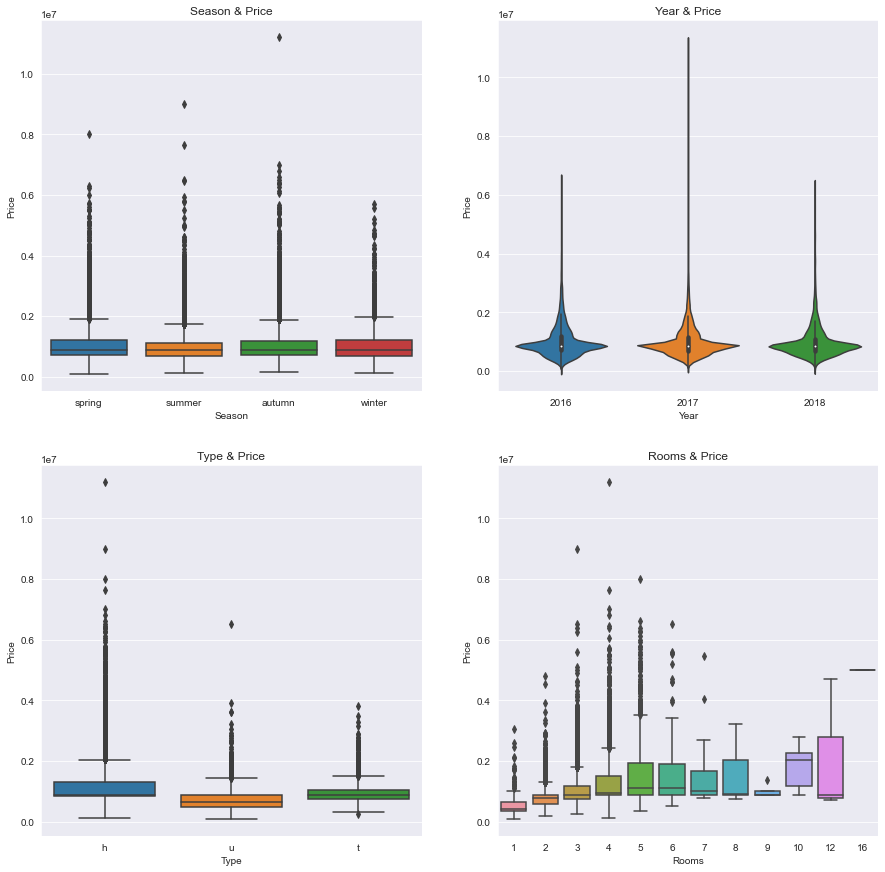

In [8]:
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = df, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(data = df, x = 'Rooms', y = 'Price', ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

__Observations:__

* Most of the properties have single bathroom
* Most of the houses have 3 rooms
* Most properties have 2 car parking space
* Majority of the houses were sold in Summer and Autumn
* 2017 holds the most sales, although it has more outliers. 2018 has less data, might be due less data collection.
* Year doesn't plays a major part when it comes to price of the property. 
* H type houses are much more costlier than the others.

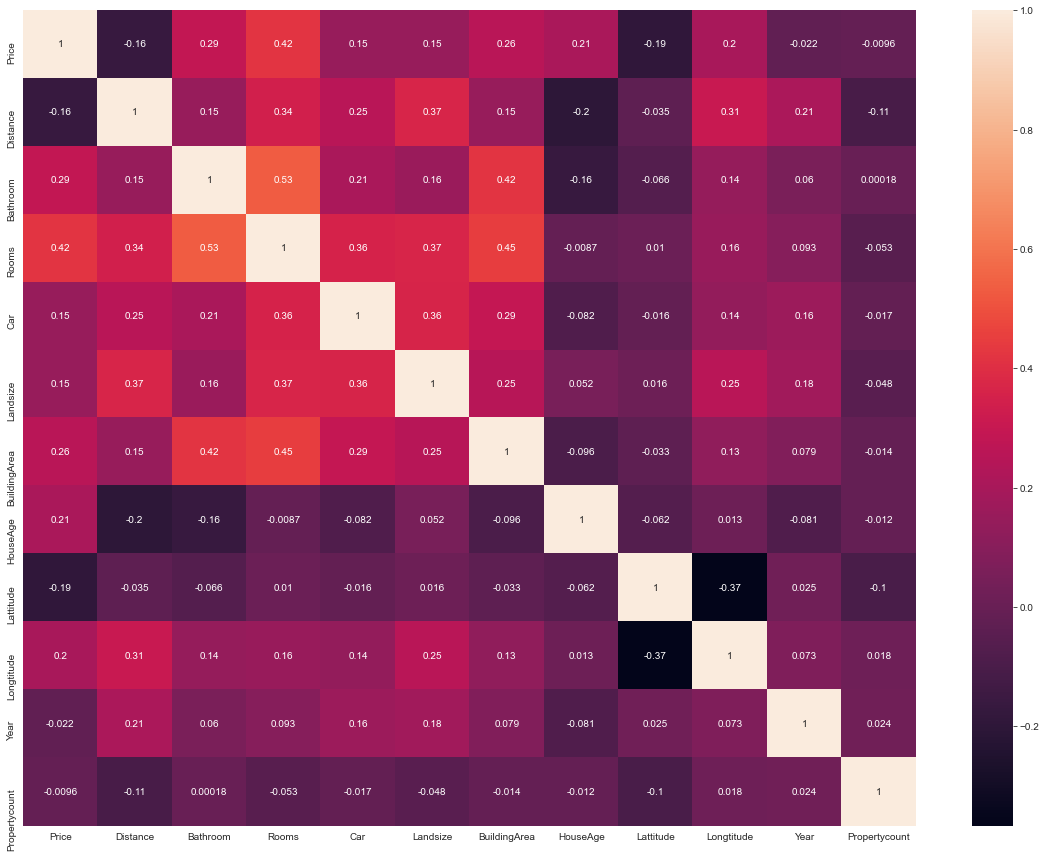

In [26]:
#correaltion matrix

columns= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'HouseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
df_corr= df[columns]

corr_matrix=df_corr.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True);

Let us now examine the relationship between Price and other variables mainly:

* Distance - correlation of -.16 (negative)
* Bathroom - correlation of .29
* Rooms - correaltion of .42
* BuildingArea - correlation of .26
* HouseAge - correaltion of .21

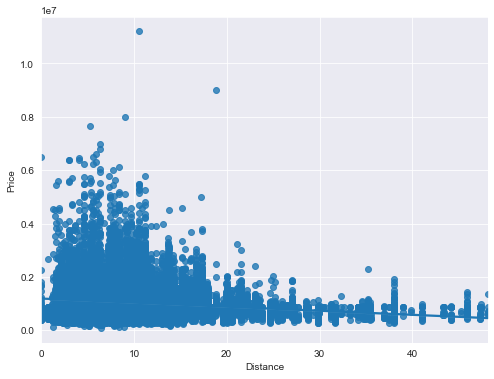

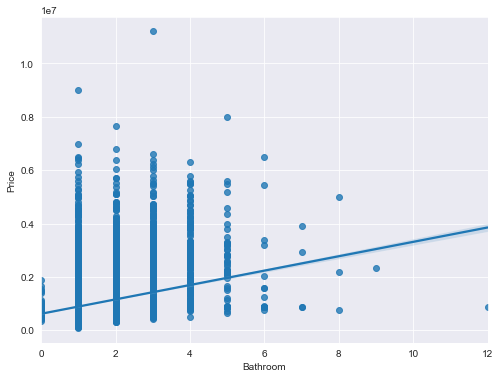

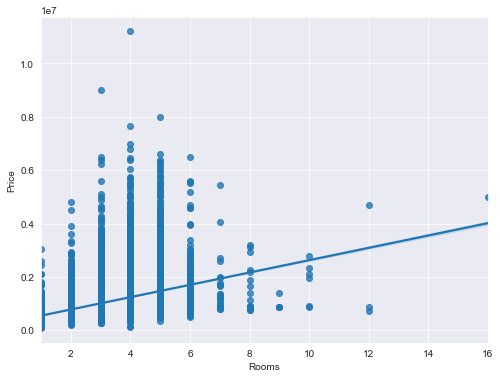

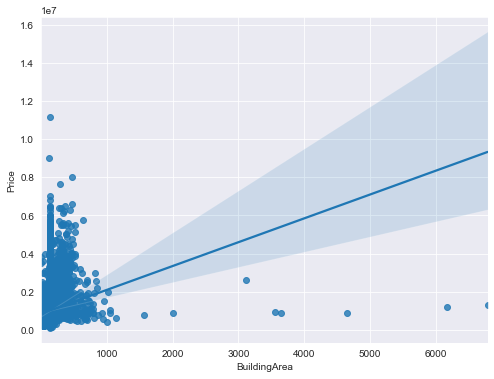

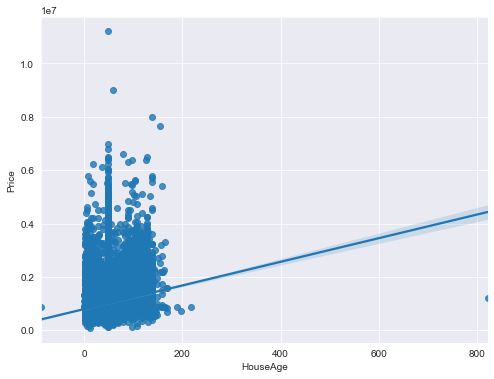

In [29]:
fin_corr = ['Distance','Bathroom','Rooms','BuildingArea','HouseAge']
for i in fin_corr:
    f, axes = plt.subplots(figsize = (8,6))
    plt.subplot()
    sns.regplot(data= df, x=i, y='Price');

__Observations:__

From the above visualizations we confirm that:

* As the distance increase form the employment center the price of the property decreases. 
* As for the Bathroom, Room, BuildingArea increases the price too increases. 
* Newly built houses are pricier.